In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,explained_variance_score,confusion_matrix,accuracy_score,classification_report,log_loss
import seaborn as sns

In [2]:
data_longbeach = pd.read_excel('LongBeach.xlsx')
data_longbeach.shape
print(data_longbeach.head())
#data_longbeach[data_longbeach['Cholesterol']==0]

     Location  Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS  \
0  Long Beach   61   M           NAP        200            0          1   
1  Long Beach   39   M           ATA        190          241          0   
2  Long Beach   45   F           ATA        180          295          0   
3  Long Beach   57   F           ASY        180          347          0   
4  Long Beach   60   M           NAP        180            0          0   

  RestingECG  MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0         ST     70              N      0.0     Flat             1  
1     Normal    106              N      0.0       Up             0  
2     Normal    180              N      0.0       Up             0  
3         ST    126              Y      0.8     Flat             0  
4         ST    140              Y      1.5     Flat             0  


In [3]:
print(data_longbeach.isnull().sum())

Location          0
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [4]:
#Investigating all features within a column

for columns in data_longbeach:
    unique_values = np.unique(data_longbeach[columns])
    count_values = len(unique_values)
    if count_values < 10:
        print('The number of values for feature {} is:{} -- {}'.format(columns,count_values,unique_values))
    else:
        print('The number of values for feature {} is:{}'.format(columns,count_values))

The number of values for feature Location is:1 -- ['Long Beach']
The number of values for feature Age is:41
The number of values for feature Sex is:2 -- ['F' 'M']
The number of values for feature ChestPainType is:4 -- ['ASY' 'ATA' 'NAP' 'TA']
The number of values for feature RestingBP is:39
The number of values for feature Cholesterol is:100
The number of values for feature FastingBS is:2 -- [0 1]
The number of values for feature RestingECG is:3 -- ['LVH' 'Normal' 'ST']
The number of values for feature MaxHR is:60
The number of values for feature ExerciseAngina is:2 -- ['N' 'Y']
The number of values for feature Oldpeak is:36
The number of values for feature ST_Slope is:3 -- ['Down' 'Flat' 'Up']
The number of values for feature HeartDisease is:2 -- [0 1]


In [5]:
data_longbeach.columns

Index(['Location', 'Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol',
       'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak',
       'ST_Slope', 'HeartDisease'],
      dtype='object')

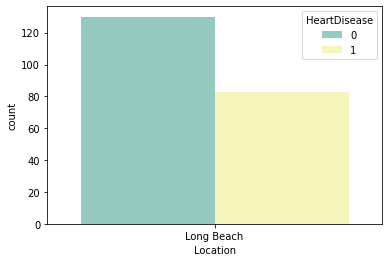

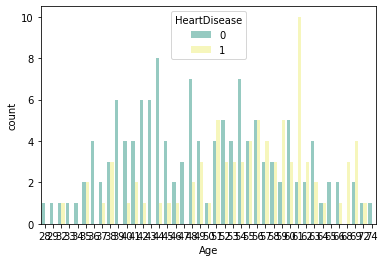

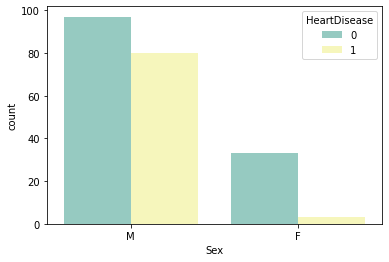

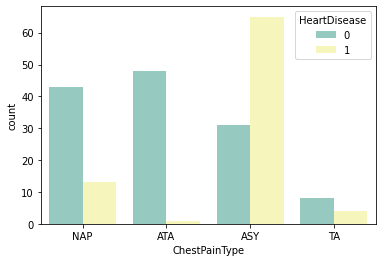

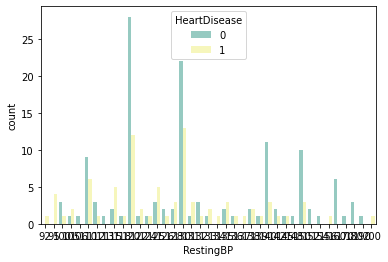

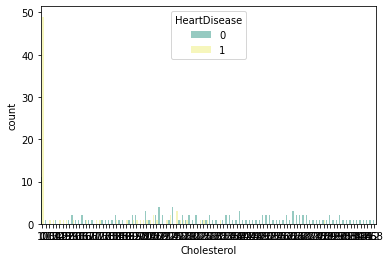

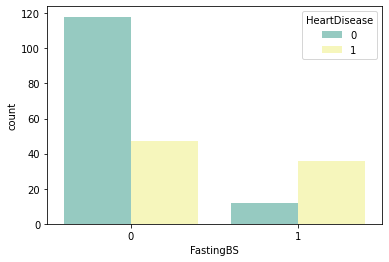

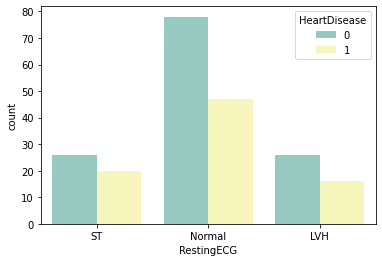

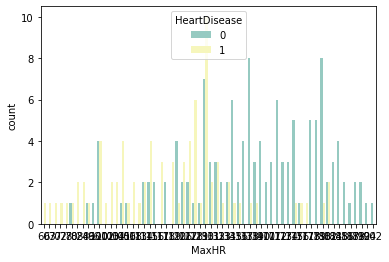

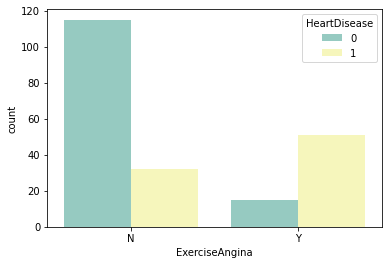

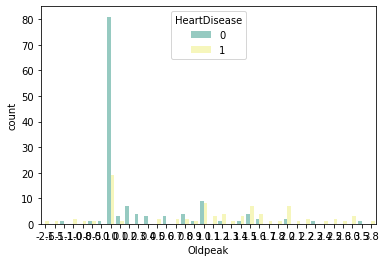

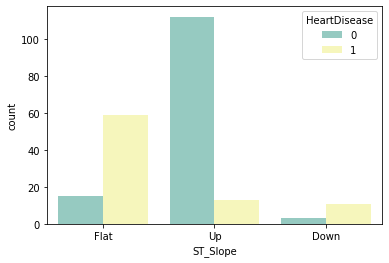

In [6]:
#Evaluating each feature and observing the affect on Y
feature = ['Location', 'Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol',
       'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak',
       'ST_Slope']

for f in feature:
    sns.countplot(x = f,data = data_longbeach,palette='Set3',hue = 'HeartDisease')
    plt.show()

In [24]:
#Feature Selection
# Converting all variables 
longbeach_data = pd.get_dummies(data_longbeach,columns = ["ChestPainType", "Sex","RestingECG","ExerciseAngina","ST_Slope"],prefix=["ChestPainType", "Sex","RestingECG","ExerciseAngina","ST_Slope"])
longbeach_data.shape
longbeach_data

,Location,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,...,Sex_F,Sex_M,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,Long Beach,61,200,0,1,70,0.0,1,0,0,...,0,1,0,0,1,1,0,0,1,0
1,Long Beach,39,190,241,0,106,0.0,0,0,1,...,0,1,0,1,0,1,0,0,0,1
2,Long Beach,45,180,295,0,180,0.0,0,0,1,...,1,0,0,1,0,1,0,0,0,1
3,Long Beach,57,180,347,0,126,0.8,0,1,0,...,1,0,0,0,1,0,1,0,1,0
4,Long Beach,60,180,0,0,140,1.5,0,0,0,...,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,Long Beach,32,95,0,1,127,0.7,1,0,0,...,0,1,0,1,0,1,0,0,0,1
209,Long Beach,51,95,0,1,126,2.2,1,1,0,...,0,1,0,1,0,1,0,0,1,0
210,Long Beach,52,95,0,1,82,0.8,1,1,0,...,0,1,0,1,0,0,1,0,1,0
211,Long Beach,57,95,0,1,182,0.7,1,1,0,...,0,1,0,1,0,1,0,1,0,0


In [25]:
print(data_longbeach.head())

     Location  Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS  \
0  Long Beach   61   M           NAP        200            0          1   
1  Long Beach   39   M           ATA        190          241          0   
2  Long Beach   45   F           ATA        180          295          0   
3  Long Beach   57   F           ASY        180          347          0   
4  Long Beach   60   M           NAP        180            0          0   

  RestingECG  MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0         ST     70              N      0.0     Flat             1  
1     Normal    106              N      0.0       Up             0  
2     Normal    180              N      0.0       Up             0  
3         ST    126              Y      0.8     Flat             0  
4         ST    140              Y      1.5     Flat             0  


In [8]:
longbeach_data['Cholesterol'].replace(0,method='ffill',inplace=True)

In [10]:
longbeach_data['Oldpeak'].replace(0,longbeach_data['Oldpeak'].mean(),inplace=True)

#As the ration of heartdisease is very different, we need to balance the dataset to avoid any bias in our model. We have used an oversampling technique to deal with the issue without loosing any data

In [12]:
X = longbeach_data.drop(['HeartDisease','Location'],axis=1).values     # Predictor feature columns 
Y = longbeach_data['HeartDisease'].values   # Predicted class (1=True, 0=False) 

0    130
1     83
Name: HeartDisease, dtype: int64


/Users/saim/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

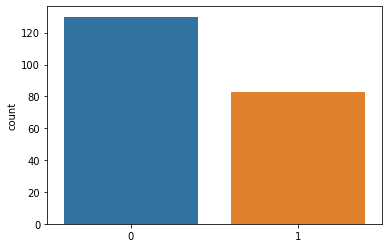

In [13]:
no_hd=data_longbeach[data_longbeach['HeartDisease']==0]
yes_hd=data_longbeach[data_longbeach['HeartDisease']== 1]
print(data_longbeach['HeartDisease'].value_counts())

sns.countplot(Y)

In [14]:
# #Handeling imbalances in dataset
from imblearn.combine import SMOTETomek
#Implementing oversampling for handeling imbalance
smk = SMOTETomek(random_state = 42)
#X_res,y_res = smk.fit_resample(X,Y)

In [17]:
from collections import Counter
#print('Original Dataset Shape {}'.format(Counter(Y)))
#print('Resampled Dataset Shape {}'.format(Counter(y_res)))
#sns.countplot(y_res)

Since Cholestrol Level Cannot be 0 we are replacing 0 with mean of the column 'Cholestrol'

# LOGISTIC REGRESSION

In [ ]:
############# Applying Logistic Regression ##################
#X_logreg = Cleve_data[columns_to_keep].values
#y_logreg = Cleve_data['HeartDisease']

In [19]:
X_logreg = longbeach_data.drop(['HeartDisease','Location'],axis=1)    # Predictor feature columns 
Y_logreg = longbeach_data['HeartDisease']

In [20]:
#Resampling for Logistic Regression
X_new,y_new = X_logreg,Y_logreg
#smk.fit_resample(

In [21]:
columns = X_new.columns

In [ ]:
## Import CV and cheking model accuracy
#from sklearn.model_selection import cross_val_score
#logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
#print(cross_val_score(logreg,X_log,y_log,cv=10,scoring='accuracy').mean())

In [22]:
##### Splitting Data for Train , Test and Validate 

X_train, X_test, y_train, y_test  = train_test_split(X_new,y_new,test_size = 0.3, random_state = 55,stratify = y_new )



In [23]:
print(X_train.shape)
print(X_test.shape)


print(y_train.shape)
print(y_test.shape)



(149, 20)
(64, 20)
(149,)
(64,)


In [ ]:
#Running Log model
model = LogisticRegression(solver='liblinear', max_iter=1000)
log_results=model.fit(X_train, y_train)

#Train Accuracy
print('Training accuracy is {}'.format(model.score(X_train,y_train)))
#predict on training set
y_pred_train = model.predict(X_train)
#Predictions using test set
y_pred = model.predict(X_test)

Model Evaluation

In [ ]:
#Accuracy Score Training Set
print('Training Set accuracy is {}'.format(model.score(X_train,y_train)))
# Accuracy of test set
print('Test Set accuracy is {}'.format(model.score(X_test,y_test)))

#Classification Report
print(classification_report(y_test,y_pred))

y_pred

In [ ]:
model.coef_[0]

In [ ]:
#Confusion Matrix
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
lr_cm = confusion_matrix(y_test,y_pred)
print(lr_cm)
lrcm_norm = lr_cm/lr_cm.sum(axis=1).reshape(-1,1)
plot_confusion_matrix(lrcm_norm,model.classes_)

In [ ]:
# def get_feature_importance(model,feature_names):
#     feature_importance = (
#     pd.DataFrame({
#             'variable':columns,
#             'coefficient':model.coef_[0]
#                 }
#                 )
#     .round(decimals=4)\
#     .sort_values('coefficient',ascending = False).reset_index(drop = True)\
#     .style.bar(color=['red','green'],align='zero')\
#     )
#     return feature_importance
# get_feature_importance(model,columns)

In [ ]:
my_dict = dict(zip(columns,model.coef_[0]))

In [ ]:
all_features = pd.DataFrame({'variable':columns,'coefficient':model.coef_[0]}).round(decimals=4)\
.sort_values('coefficient',ascending = False).reset_index(drop=True)
#.set_index('variable')

In [ ]:
confusion_matrix(y_test,y_pred)


In [ ]:
all_features.style.bar(color=['red','green'],align='zero')

In [ ]:
# Running OLS 
import statsmodels.api as sm
from scipy import stats
est = sm.Logit(y_train, X_train)
lg = est.fit()
print(lg.summary())

In [ ]:
selected_features = all_features.drop([11,12,13,14,15])

In [ ]:
selected_features = selected_features.reset_index(drop=True)

In [ ]:
filtered= []
for i in selected_features['variable']:
    filtered.append(i)

In [ ]:
#LOG REG WITH SELECTED FEATURES
X_lg_1 = longbeach_data[filtered]
X_new_1,y_new_1 = smk.fit_resample(X_lg_1,Y_logreg)
X_train_1,X_test_1,y_train_1,y_test_1 = train_test_split(X_new_1,y_new_1, train_size=0.7,test_size = 0.3, random_state = 55,stratify = y_new_1)
#Validation split
X_train_1,X_valid_1,y_train_1,y_valid_1 = train_test_split(X_train_1,y_train_1,train_size = 0.80 , test_size = 0.2,random_state=55,stratify=y_train_1)
model.fit(X_train_1, y_train_1)
y_pred_1 = model.predict(X_test_1)


In [ ]:
#Accuracy Score Training Set
print('Training Set accuracy is {}'.format(model.score(X_train_1,y_train_1)))
# Accuracy of test set
print('Test Set accuracy is {}'.format(model.score(X_test_1,y_test_1)))

#Classification Report
print(classification_report(y_test_1,y_pred_1))

y_pred
predict_proba_1 = model.predict_proba(X_test_1)

In [ ]:
new_scores = pd.DataFrame({'variable':filtered,'coefs':model.coef_[0]}).round(decimals=4)\
.sort_values('coefs',ascending = False).reset_index(drop=True)\
.style.bar(color=['red','green'],align='zero')

new_scores 

EVALUATION METRIC 2 - CONFUSION MATRIX

In [ ]:
#Visualizing CM
cm = confusion_matrix(y_test_1,y_pred_1)
# interms of percentage
cm_norm = cm/cm.sum(axis=1).reshape(-1,1)
cm_norm

In [ ]:
y_pred.shape

In [ ]:
cm

In [ ]:
plot_confusion_matrix(cm_norm,model.classes_)

PARAMETER TUNING FOR REDUCING LOGLOSS
TUNING THE C PARAM
We will loop over parameter C (Inverse of regularization strength).
Inverse of regularization strength helps to avoid overfitting - it penalizes large values of your parameters
It also helps to find Global Minimum by moving to better "solutions" from local minimum to global minimum
The values of C to search should be n-equally-spaced values in log space ranging from 1e-5 to 1e5

A local minimum of a function is a point where the function value is smaller than at nearby points, but possibly greater than at a distant point. A global minimum is a point where the function value is smaller than at all other feasible points.

# CLASSIFICATION TREES

In [ ]:
params = {
    'criterion':['gini','entropy'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,None],
    'min_samples_split':[0.1,0.2,0.3],
    'min_samples_leaf':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2',None],
    'splitter':['best','random']
    
}

In [ ]:
#Choosing best params using GridSearchCV
clf = GridSearchCV(DecisionTreeClassifier(random_state = 0),param_grid=params,cv=5,n_jobs=-1)

In [ ]:
clf.fit(X_train,y_train)

In [ ]:
clf.best_estimator_
x = clf.best_estimator_

In [ ]:
dt = x
dt.fit(X_train,y_train)
y_pred= dt.predict(X_test)


In [ ]:
dt.score(X_train,y_train)

In [ ]:
print(dt.score(X_test,y_test))
print(classification_report(y_test,y_pred))

In [ ]:
fi_col =[]
fi = []
from sklearn import metrics

#Running Feature Importance 
for i,column in enumerate(longbeach_data.drop(['HeartDisease','Location'],axis=1)):
    print('The Feature importance for {} is:{}'.format(column,dt.feature_importances_[i]))
    
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])
    

In [ ]:
df_cm =confusion_matrix(y_test,y_pred)
df_cm
dfcm_percentage = df_cm/df_cm.sum(axis=1).reshape(-1,1)
plot_confusion_matrix(dfcm_percentage,dt.classes_)

In [ ]:
df_cm

In [ ]:
fi_df=zip(fi_col,fi)
fi_df = pd.DataFrame(fi_df,columns=['Feature','Feature Importance'])
importance = fi_df.sort_values('Feature Importance',ascending = False).reset_index(drop = True)
importance


In [ ]:
columns_to_keep = importance['Feature'][0:4]
longbeach_data[columns_to_keep].shape

In [ ]:
dt_longbeach = longbeach_data[columns_to_keep]

In [ ]:
print(dt_longbeach.shape)
print(Y.shape)

In [ ]:
dt_x,dt_y = dt_longbeach,Y
#smk.fit_resample

In [ ]:
x_train,x_test,Y_train,Y_test = train_test_split(dt_x,dt_y,test_size=0.3,stratify=dt_y)

In [ ]:
clf_2 = GridSearchCV(DecisionTreeClassifier(random_state=0),param_grid=params,cv=8,n_jobs=-1)

In [ ]:
clf_2.fit(x_train,Y_train)

In [ ]:
print(clf_2.best_estimator_)
x2 = clf_2.best_estimator_

In [ ]:

dt_2 = x2
dt_2.fit(x_train,Y_train)
dt_pred_2 = dt_2.predict(x_test)
dt_2.score(x_test,Y_test)

In [ ]:
df_cm_2 =confusion_matrix(Y_test,dt_pred_2)
print(df_cm_2)
df2_norm = df_cm_2/df_cm_2.sum(axis=1).reshape(-1,1)
plot_confusion_matrix(df2_norm,dt_2.classes_)
print(classification_report(Y_test,dt_pred_2))

In [ ]:
print(classification_report(Y_test,dt_pred_2))